# **FUN4: Find workspace and show how check answer**

นายณัฐภัทร สุขปัญญา 65340500023

In [1]:
import roboticstoolbox as rtb
import numpy as np
from spatialmath import SE3
import matplotlib.pyplot as plt
from math import pi

## 1. Modified DH-Parameters

Home config

![config](./image/homeconfig.png)

In [3]:
# Create MDH Parameter
robot = rtb.DHRobot(
    [
        rtb.RevoluteMDH(alpha = 0.0,a = 0.0,d = 0.2,offset = 0.0),
        rtb.RevoluteMDH(alpha = pi/2,a = 0.0,d = 0.12,offset = pi/2),
        rtb.RevoluteMDH(alpha = 0,a = 0.25,d = -0.1,offset = pi/2),

    ],tool = SE3.Tx(0.28),
    name = "RRR_Robot"
)
print('MDH-Parameter ของแขนกล')
print(robot)

MDH-Parameter ของแขนกล
DHRobot: RRR_Robot, 3 joints (RRR), dynamics, modified DH parameters
┌──────┬───────┬───────────┬──────┐
│ aⱼ₋₁ │ ⍺ⱼ₋₁  │    θⱼ     │  dⱼ  │
├──────┼───────┼───────────┼──────┤
│  0.0 │  0.0° │        q1 │  0.2 │
│  0.0 │ 90.0° │  q2 + 90° │ 0.12 │
│ 0.25 │  0.0° │  q3 + 90° │ -0.1 │
└──────┴───────┴───────────┴──────┘

┌──────┬──────────────────────────────────────┐
│ tool │ t = 0.28, 0, 0; rpy/xyz = 0°, 0°, 0° │
└──────┴──────────────────────────────────────┘



##### 1.1. แสดง Kinematic ของ MDH-Parameter

In [4]:
# หา Forward kinematic ที่จุด Home Configuration
q = [0,0,0] # สร้างค่า q

con_T_0e = robot.fkine(q) # ใส่ค่า q ลงในตาราง DH
print('Transformation ของ End-Effector ที่จุด Home Configuration')
print(con_T_0e) # จะได้ forward kinematic ของหุ่น RRR_Robot

Transformation ของ End-Effector ที่จุด Home Configuration
  -1         0         0        -0.28      
   0         0        -1        -0.02      
   0        -1         0         0.45      
   0         0         0         1         



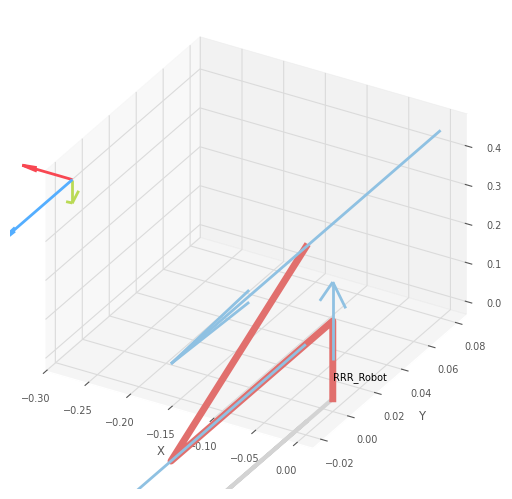

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'RRR_Robot')

<Figure size 640x480 with 0 Axes>

In [5]:
robot.plot(q)

## 2. Check answer that position x, y, z is in workspace

![Dimwnsion](./image/Dimension.png)
![sphere_formula](./image/sphere_formula.jpg)

อ้างอิงภาพสมการวงกลมจาก: [Spheres formula](https://www.youtube.com/watch?v=49qZEuhNhbI)

- จาก Dimension พบว่าเมื่อแขนเหยียดออกสุดจะมีรัศมีวัดจาก Joint2 ถึงปลายมือสูงสุดที่ (250+150+130)/1000 = 0.53 เมตร ดังนั้น r_max = 0.53

- ส่วนรัศมีที่น้อยที่สุดหาจากความยาวจาก Joint3 ถึงปลายมือ ลบกับความยาวจาก Joint2 ถึง Joint3 จะได้ ((150+130)-250)/1000 = 0.03 เมตร ดังนั้น r_min = 0.03

- และจากสมการทรงกลมจะสามารถทำให้เราหาค่า x,y,z ที่อยู่ในช่วงของ r_min และ r_max ได้ดัง code ด้านล่างดังนี้

In [6]:
r_min = 0.03
r_max = 0.53
l1 = 0.2 # offset z axis from joint2 to origin 

def check_ws(x,y,z):
    distance_squared = x**2 + y**2 + (z-l1)**2
    if r_min**2 <= distance_squared <= r_max**2:
        print(f'x: {x}, y: {y}, z: {z} is in workspace')
    else:
        print(f'x: {x}, y: {y}, z: {z} is not in workspace')

In [8]:
check_ws(0.3,-0.02,0.5)
check_ws(1.0,0.7,0.5)

x: 0.3, y: -0.02, z: 0.5 is in workspace
x: 1.0, y: 0.7, z: 0.5 is not in workspace


## 3. Find workspace of robot arm

##### แสดงให้เห็น Workspace ของหุ่นยนต์

X-axis Range: Min = -0.5302736722589578, Max = 0.5288242909415624
Y-axis Range: Min = -0.5291958959598242, Max = 0.5292227798098305
Z-axis Range: Min = -0.3299979245510126, Max = 0.7299562813562297


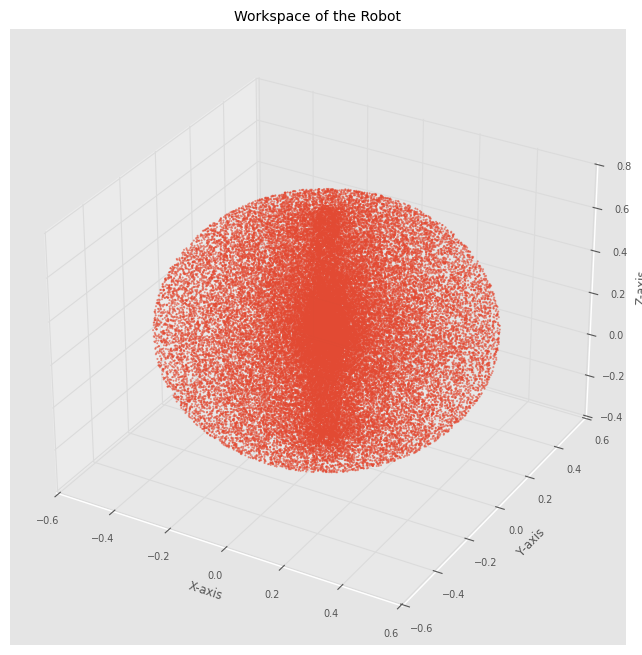

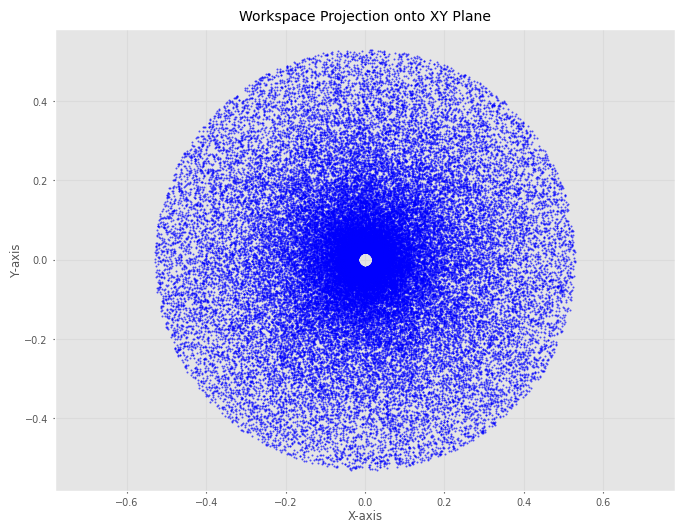

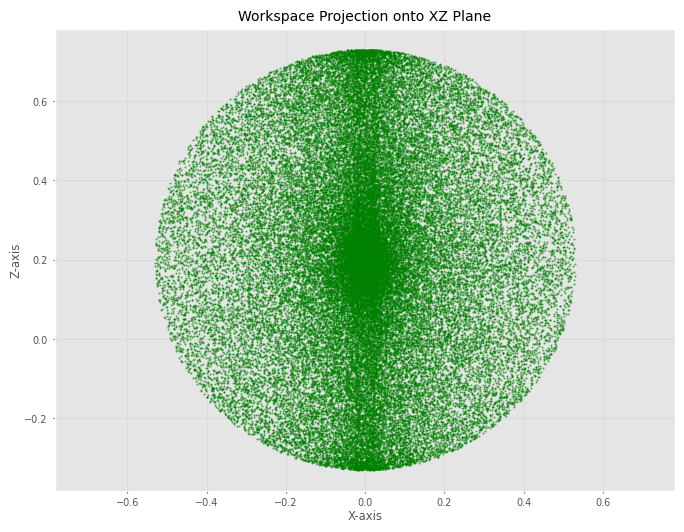

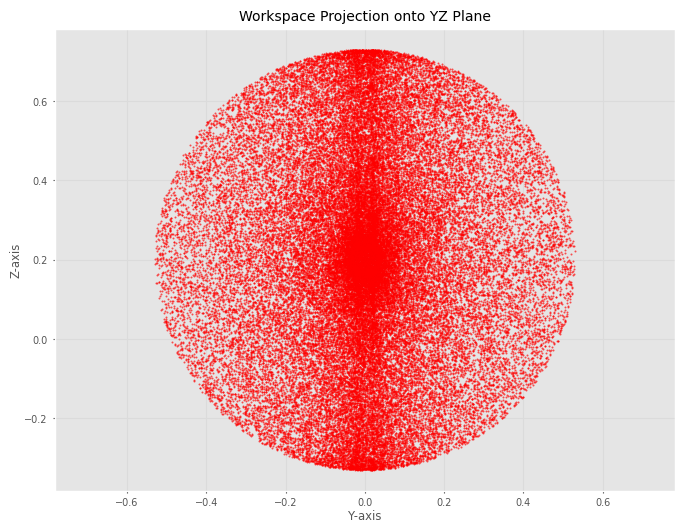

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define joint limits for each joint
joint_limits = [
    (-np.pi, np.pi),  # Joint 1 limits
    (-np.pi, np.pi),  # Joint 2 limits
    (-np.pi, np.pi),  # Joint 3 limits
]

# Number of samples
N = 60000

# Generate random joint configurations within the limits
q_samples = np.zeros((N, 3))
for i, (q_min, q_max) in enumerate(joint_limits):
    q_samples[:, i] = np.random.uniform(q_min, q_max, N)

# Compute the end-effector positions
ee_positions = np.zeros((N, 3))
for i, q in enumerate(q_samples):
    T = robot.fkine(q)  # FK
    ee_positions[i, :] = T.t

# Find the max and min range for each axis (X, Y, Z)
x_min, x_max = np.min(ee_positions[:, 0]), np.max(ee_positions[:, 0])
y_min, y_max = np.min(ee_positions[:, 1]), np.max(ee_positions[:, 1])
z_min, z_max = np.min(ee_positions[:, 2]), np.max(ee_positions[:, 2])

print(f"X-axis Range: Min = {x_min}, Max = {x_max}")
print(f"Y-axis Range: Min = {y_min}, Max = {y_max}")
print(f"Z-axis Range: Min = {z_min}, Max = {z_max}")

# Plot the workspace
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ee_positions[:, 0], ee_positions[:, 1], ee_positions[:, 2], s=1, alpha=0.5)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Workspace of the Robot')
plt.show()

# Plot the XY plane projection
plt.figure(figsize=(8, 6))
plt.scatter(ee_positions[:, 0], ee_positions[:, 1], s=1, alpha=0.5, color='blue')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Workspace Projection onto XY Plane')
plt.axis('equal')  
plt.grid(True)
plt.show()

# Plot the XZ plane projection
plt.figure(figsize=(8, 6))
plt.scatter(ee_positions[:, 0], ee_positions[:, 2], s=1, alpha=0.5, color='green')
plt.xlabel('X-axis')
plt.ylabel('Z-axis')
plt.title('Workspace Projection onto XZ Plane')
plt.axis('equal')  
plt.grid(True)
plt.show()

# Plot the YZ plane projection
plt.figure(figsize=(8, 6))
plt.scatter(ee_positions[:, 1], ee_positions[:, 2], s=1, alpha=0.5, color='red')
plt.xlabel('Y-axis')
plt.ylabel('Z-axis')
plt.title('Workspace Projection onto YZ Plane')
plt.axis('equal')  
plt.grid(True)
plt.show()
